### Project 1

Background:

ACME is one of the fastest growing startups in the logistics and delivery domain. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Goals:

Predict if a customer is happy or not based on the answers they give to questions asked. 
Which questions/features are more important when predicting a customer’s happiness? 
Is there any question that we can remove in our next surve? 
What is the minimal set of attributes/features that would preserve the most information about the problem?

Success Metrics:

Reach 73% accuracy score or above

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


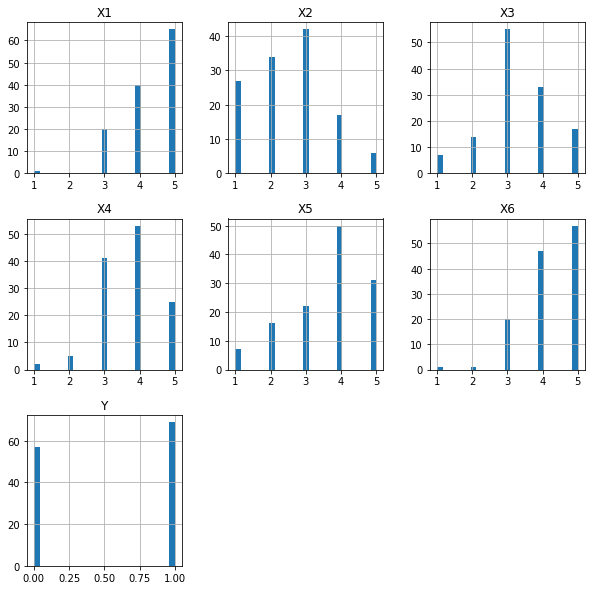

In [3]:
df.hist(bins=25, figsize =(10,10))
plt.show()

#### Correlations Between Variables

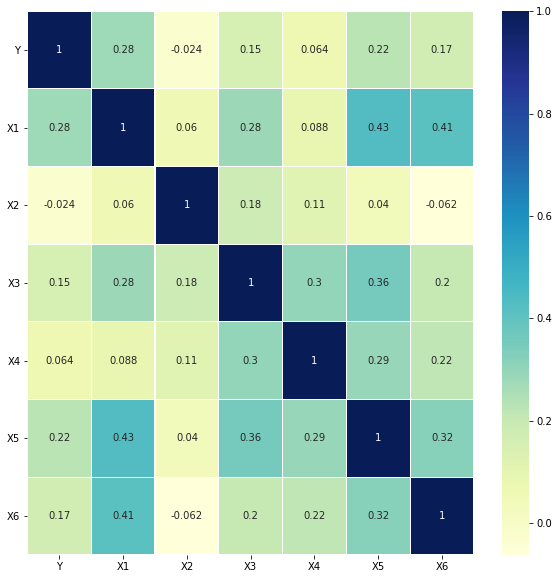

In [4]:
# check for correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Let's see the distribution of happy and unhappy customers

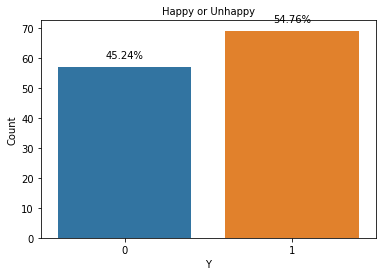

In [7]:
total = float(len(df))

g = sns.countplot(x='Y', data=df)
g.set_title("Happy or Unhappy", fontsize=10)
g.set_ylabel("Count", fontsize=10)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

posx and posy should be finite values
posx and posy should be finite values


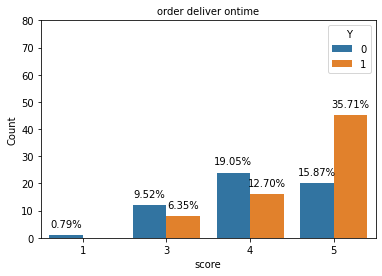

In [10]:
g2 = sns.countplot(x='X1', hue='Y', data=df)
g2.set_title("order deliver ontime", fontsize=10)
g2.set_xlabel("score", fontsize=10)
g2.set_ylabel("Count", fontsize=10)
g2.set_ylim(0,80)

for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 


Happy customers likely to give a higher score, while unhappy customers tend to give a middle score

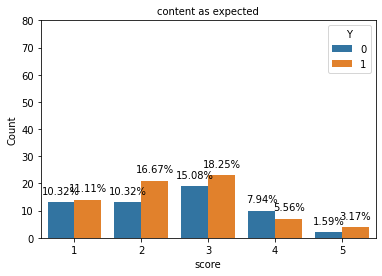

In [11]:
g3 = sns.countplot(x='X2', hue='Y', data=df)
g3.set_title("content as expected", fontsize=10)
g3.set_xlabel("score", fontsize=10)
g3.set_ylabel("Count", fontsize=10)
g3.set_ylim(0,80)

for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

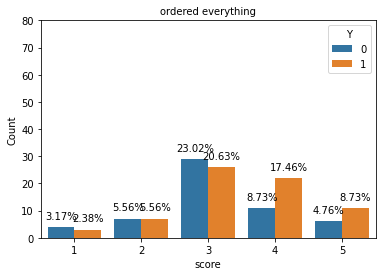

In [12]:
g4 = sns.countplot(x='X3', hue='Y', data=df)
g4.set_title("ordered everything", fontsize=10)
g4.set_xlabel("score", fontsize=10)
g4.set_ylabel("Count", fontsize=10)
g4.set_ylim(0,80)

for p in g4.patches:
    height = p.get_height()
    g4.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

posx and posy should be finite values
posx and posy should be finite values


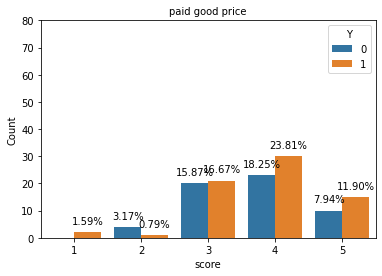

In [14]:
g5 = sns.countplot(x='X4', hue='Y', data=df)
g5.set_title("paid good price", fontsize=10)
g5.set_xlabel("score", fontsize=10)
g5.set_ylabel("Count", fontsize=10)
g5.set_ylim(0,80)

for p in g5.patches:
    height = p.get_height()
    g5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

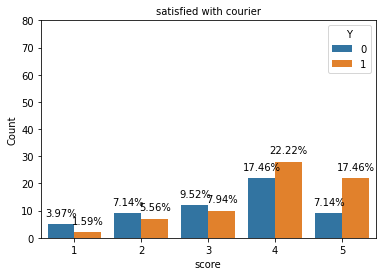

In [15]:
g6 = sns.countplot(x='X5', hue='Y', data=df)
g6.set_title("satisfied with courier", fontsize=10)
g6.set_xlabel("score", fontsize=10)
g6.set_ylabel("Count", fontsize=10)
g6.set_ylim(0,80)

for p in g6.patches:
    height = p.get_height()
    g6.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


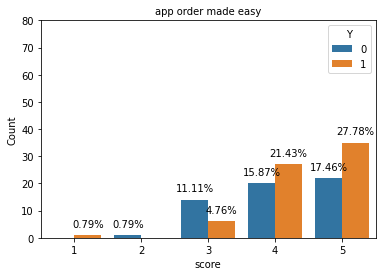

In [16]:
g7 = sns.countplot(x='X6', hue='Y', data=df)
g7.set_title("app order made easy", fontsize=10)
g7.set_xlabel("score", fontsize=10)
g7.set_ylabel("Count", fontsize=10)
g7.set_ylim(0,80)

for p in g7.patches:
    height = p.get_height()
    g7.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

It looks like happy customers tend to give higher scores for X1, X5 attributes

It looks like X1 is most correlated with Y, so we consider to use X1 along first and check for the performance

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

In [21]:
X = df.drop(['Y','X2','X3','X4','X5','X6'], axis=1)
y = df.Y
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
%%time
rfc = RandomForestClassifier(n_estimators=100, random_state = 123, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_test)
print("Random Forest")
print("Accuracy score {:.4f}".format(accuracy_score(y_test, y_pred1)))

Random Forest
Accuracy score 0.5385
CPU times: user 235 ms, sys: 46.4 ms, total: 282 ms
Wall time: 397 ms


In [24]:
%%time
model1 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test, pred1)))

XGBoost
Accuracy score 0.5385
CPU times: user 86.1 ms, sys: 16.7 ms, total: 103 ms
Wall time: 57.1 ms


Now, X1 and X5

In [26]:
X2 = df.drop(['Y','X2','X3','X4','X6'], axis=1)
y2 = df.Y
y2 = y2.ravel()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=123)

In [29]:
%%time
model2 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model2.fit(X_train2, y_train2)
pred2 = model2.predict(X_test2)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test2, pred2)))

XGBoost
Accuracy score 0.5385
CPU times: user 24.7 ms, sys: 2.64 ms, total: 27.4 ms
Wall time: 28.5 ms


Now, consider X1, X5, X6

In [30]:
X3 = df.drop(['Y','X2','X3','X4'], axis=1)
y3 = df.Y
y3 = y3.ravel()

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=123)

In [31]:
%%time
model3 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model3.fit(X_train3, y_train3)
pred3 = model3.predict(X_test3)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test3, pred3)))

XGBoost
Accuracy score 0.6154
CPU times: user 28.4 ms, sys: 2.8 ms, total: 31.2 ms
Wall time: 32.3 ms


X1, X3, X5, X6

In [32]:
X4 = df.drop(['Y','X2','X4'], axis=1)
y4 = df.Y
y4 = y4.ravel()

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=123)

In [33]:
%%time
model4 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model4.fit(X_train4, y_train4)
pred4 = model4.predict(X_test4)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test4, pred4)))

XGBoost
Accuracy score 0.6923
CPU times: user 31.2 ms, sys: 2.5 ms, total: 33.7 ms
Wall time: 35.2 ms


Model with X1, X3, X5, X6 has the highest accuracy score

X1, X3, X5

In [34]:
X5 = df.drop(['Y','X2','X4', 'X6'], axis=1)
y5 = df.Y
y5 = y5.ravel()

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=123)

In [35]:
%%time
model5 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model5.fit(X_train5, y_train5)
pred5 = model5.predict(X_test5)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test5, pred5)))

XGBoost
Accuracy score 0.6538
CPU times: user 29.6 ms, sys: 2.93 ms, total: 32.5 ms
Wall time: 32 ms


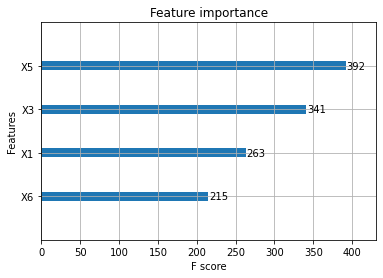

In [53]:
# model 5 feature importance
plot_importance(model4)
plt.show()

Drop X2, model with x1, x3, x4, x5, x6

In [40]:
X7 = df.drop(['Y','X2'], axis=1)
y7 = df.Y
y7 = y7.ravel()

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=123)

In [41]:
model7 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model7.fit(X_train7, y_train7)
pred7 = model7.predict(X_test7)
print("Accuracy score {:.4f}".format(accuracy_score(y_test7, pred7)))

Accuracy score 0.5769


Full model

In [38]:
X6 = df.drop(['Y'], axis=1)
y6 = df.Y
y6 = y6.ravel()

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=123)

In [39]:
model6 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model6.fit(X_train6, y_train6)
pred6 = model6.predict(X_test6)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test6, pred6)))

XGBoost
Accuracy score 0.5385


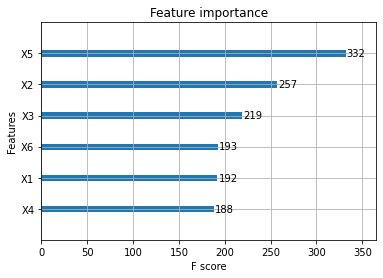

In [51]:
# full model feature importance
from xgboost import plot_importance
plot_importance(model6)
plt.show()

X3, X5

In [55]:
X8 = df.drop(['Y','X1','X2','X4', 'X6'], axis=1)
y8 = df.Y
y8 = y8.ravel()

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=123)

model8 = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, gamma=0,\
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.05)
model8.fit(X_train8, y_train8)
pred8 = model8.predict(X_test8)
print("XGBoost")
print("Accuracy score {:.4f}".format(accuracy_score(y_test8, pred8)))

XGBoost
Accuracy score 0.5000


#### Conclusion

Based on all model results, we can see that X5 is the most important feature. Based on correlation map, we can see that X1 has the greatest correlation with Y among all other models. **We may conclude that attributes X1 and X5 are more important when predicting customer's happiness.**

The full model does not perform well. Once we drop X2 and X4 - that is - a model with attributes X1, X3, X5, X6, model performance boost to 0.69. In addition, X2 and X4 has minimal correlations with the output. **We conclude that attributes/questions X2 and X4 may be removed in next survey.**

The minimum set consisting of attributes X1, X3 and X5 would preserved the most information about the questions.

#### Final Model
Y ~ X1,X3,X5,X6

In [54]:
import pickle
s = pickle.dumps(model4)
from joblib import dump, load
dump(model4, 'happycustomer')

['happycustomer']